## Importing necessary packages 

In [1]:
import numpy as np
import pandas as pd
import splitfolders 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


## Splitting the data into train and test

In [4]:
input_folder=r'C:\Users\admin\PycharmProjects\NullClass\Task2_Animal_detection_model\animals\animals'
output=r'C:\Users\admin\PycharmProjects\NullClass\Task2_Animal_detection_model\animals'
splitfolders.ratio(input= input_folder, output=output, seed= 42, ratio=(.80,.20))

In [2]:
img_size=128
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory(r'C:\Users\admin\PycharmProjects\NullClass\Task2_Animal_detection_model\animals\train', 
                                                  target_size=(img_size,img_size),
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)
datagen_validation=ImageDataGenerator()
validation_generator=datagen_validation.flow_from_directory(r'C:\Users\admin\PycharmProjects\NullClass\Task2_Animal_detection_model\animals\val',
                                                            target_size=(img_size,img_size),
                                                            color_mode='grayscale',
                                                            batch_size=batch_size,
                                                            class_mode='categorical',
                                                            shuffle=True)

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


In [3]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.5)(x)
    
    return x

In [4]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    return x

In [5]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (5, 5))
    conv_3 = Convolution(conv_2, 128, (3, 3))

    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)

    output = Dense(90, activation="softmax")(dense_1)
    model = Model(inputs=[inputs], outputs=[output])
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=["accuracy"])

    return model


In [6]:
model = model_fer((128,128,1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 90)             │        23,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,539,354 (32.58 MB)

 Trainable params: 8,538,394 (32.57 MB)

 Non-trainable params: 960 (3.75 KB)

In [7]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [8]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

C:\Users\admin\PycharmProjects\NullClass\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


C:\Users\admin\PycharmProjects\NullClass\.venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0207 - loss: 4.9402
Epoch 1: saving model to model.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 270s 4s/step - accuracy: 0.0208 - loss: 4.9369 - val_accuracy: 0.0264 - val_loss: 5.5120
Epoch 2/15
 1/67 ━━━━━━━━━━━━━━━━━━━━ 3:07 3s/step - accuracy: 0.0469 - loss: 4.5115

C:\Users\admin\PycharmProjects\NullClass\.venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 256ms/step - accuracy: 0.0469 - loss: 4.5115 - val_accuracy: 0.0244 - val_loss: 5.4618
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0659 - loss: 4.1975
Epoch 3: saving model to model.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.0660 - loss: 4.1974 - val_accuracy: 0.0713 - val_loss: 4.1618
Epoch 4/15
 1/67 ━━━━━━━━━━━━━━━━━━━━ 3:28 3s/step - accuracy: 0.1250 - loss: 3.8981
Epoch 4: saving model to model.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 24s 311ms/step - accuracy: 0.1250 - loss: 3.8981 - val_accuracy: 0.0742 - val_loss: 4.1564
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1208 - loss: 3.8647
Epoch 5: saving model to model.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.1208 - loss: 3.8648 - val_accuracy: 0.0840 - val_loss: 4.0656
Epoch 6/15
 1/67 ━━━━━━━━━━━━━━━━━━━━ 2:59 3s/step - accuracy: 0.1562 - loss: 3.6063
Epoch 6: saving model to mo

In [9]:
model.evaluate(validation_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 726ms/step - accuracy: 0.1595 - loss: 3.7967


[3.8615565299987793, 0.15000000596046448]

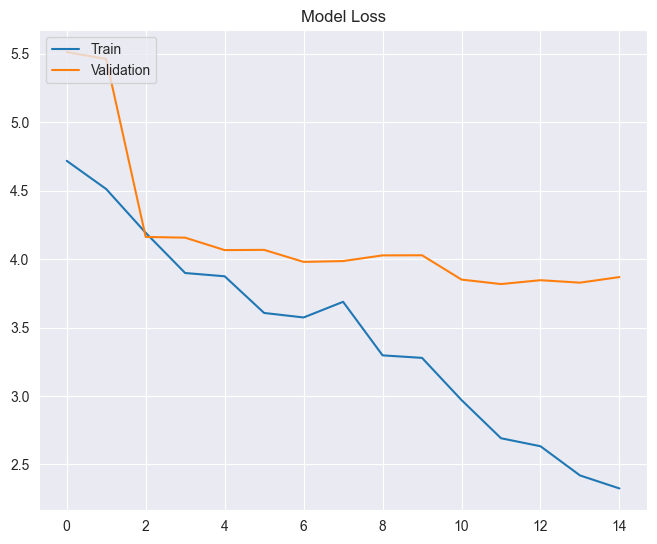

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

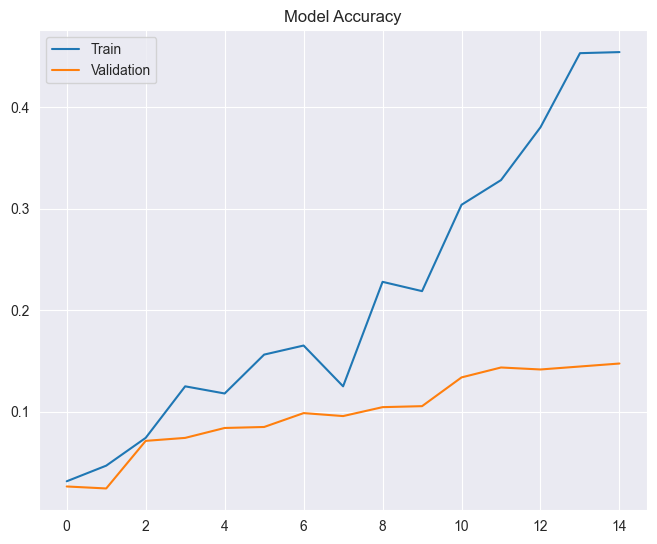

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [12]:
# Save the entire model
model.save("animal_detection_model.h5")


In [13]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)